In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Loading data
data = pd.read_csv("hour.csv")
data.drop(["instant","dteday","casual","registered"],axis=1,inplace=True) # Removing redundant columns
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(data.drop(["cnt"],axis=1),
                                                    data["cnt"],
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

In [4]:
# Fitting a linear model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# The coefficients for each columns
model.coef_

array([ 1.88566179e+01,  8.21143695e+01,  2.89737632e-02,  7.73136820e+00,
       -2.56843298e+01,  1.96643390e+00,  2.20136242e+00, -5.09123917e+00,
        6.66738672e+01,  2.46663632e+02, -1.93213251e+02,  4.45305753e+01])

In [6]:
model.intercept_

-25.223140960840936

In [7]:
# Taking predictions
y_pred = model.predict(X_test)

In [8]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))

The R-squared score is 0.3896


In [9]:
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The Root Mean Squared error is 141.4020


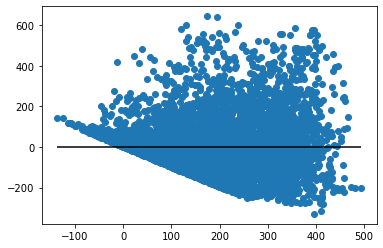

In [10]:
# Residual plot(by predicted value)
plt.scatter(y_pred,y_test-y_pred)
plt.hlines(0,min(y_pred),max(y_pred))
plt.show()

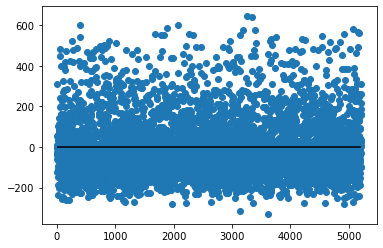

In [11]:
# Residual plot(overall)
plt.scatter(np.arange(len(y_test)),y_test-y_pred)
plt.hlines(0,0,len(y_test))
plt.show()

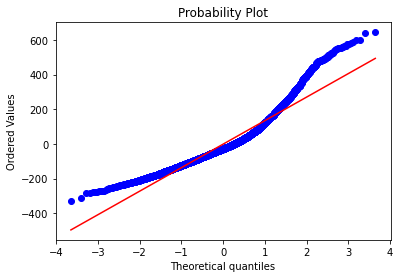

In [12]:
## Normal QQ-plot
probplot(y_test-y_pred,plot=plt)
plt.show()